In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:

pip install matplotlib


In [7]:
train = pd.read_csv(r'cs-training.csv').drop(['Unnamed: 0'],axis=1)
test = pd.read_csv(r'cs-test.csv').drop(['Unnamed: 0'],axis=1)

In [19]:
train_redup= train.drop_duplicates()

In [20]:
train_redup.duplicated().sum()

0

In [23]:
test.shape

(101503, 11)

In [26]:
train_redup.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [27]:
def findMiss(df):
    return round(df.isnull().sum()/df.shape[0]*100,2)

In [28]:
findMiss(train_redup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

In [30]:
train_redup[train_redup.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [31]:
train_redup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [32]:
train_redup.groupby(['NumberOfDependents']).size()

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [33]:
fam_miss = train_redup[train_redup.NumberOfDependents.isnull()]
fam_nmiss = train_redup[train_redup.NumberOfDependents.notnull()]


In [35]:
fam_miss.shape

(3828, 11)

In [37]:
fam_nmiss.shape

(145563, 11)

In [38]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

C:\Users\kumar\AppData\Local\Temp\ipykernel_8976\693308875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
C:\Users\kumar\AppData\Local\Temp\ipykernel_8976\693308875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [40]:
findMiss(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [41]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [42]:
fam_nmiss['MonthlyIncome'].agg(['mean','median','min'])

mean      6675.098269
median    5400.000000
min          0.000000
Name: MonthlyIncome, dtype: float64

In [44]:
fam_nmiss['MonthlyIncome'].agg([max])

C:\Users\kumar\AppData\Local\Temp\ipykernel_8976\951362978.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  fam_nmiss['MonthlyIncome'].agg([max])


max    3008750.0
Name: MonthlyIncome, dtype: float64

In [45]:
fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())

C:\Users\kumar\AppData\Local\Temp\ipykernel_8976\100680096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nmiss['MonthlyIncome'] = fam_nmiss['MonthlyIncome'].fillna(fam_nmiss['MonthlyIncome'].median())


In [46]:
findMiss(fam_nmiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [59]:
filled_train = pd.concat([fam_nmiss,fam_miss])

In [60]:
filled_train.shape

(149391, 11)

In [62]:
findMiss(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [63]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [64]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

SeriousDlqin2yrs
0    0.933001
1    0.066999
dtype: float64

In [65]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [66]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.99])

0.99    1.093922
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [67]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] < 1]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000,1.460530e+05,146053.000000,146053.000000,146053.000000,146053.000000,146053.000000
mean,0.060033,0.302913,52.494827,0.379739,356.946590,6.312113e+03,8.529246,0.229026,1.030188,0.207514,0.736664
std,0.237549,0.336767,14.715735,3.890212,2060.104556,1.308137e+04,5.148874,3.863995,1.132337,3.851532,1.105854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.028834,42.000000,0.000000,0.177355,3.640000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.144441,52.000000,0.000000,0.368084,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.517573,63.000000,0.000000,0.877956,7.453000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,1.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [68]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,50.630705,0.186722,571.918644,7310.817427,5.763485,0.074689,1.186722,0.087137,0.651452
std,0.256587,5123.802683,14.565389,0.579502,1772.948412,5964.524303,3.114160,0.579711,1.065750,0.559651,1.022093
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,39.000000,0.000000,0.217813,5000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2012.000000,48.000000,0.000000,0.402560,5400.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4116.000000,62.000000,0.000000,59.000000,8607.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [69]:
util_droped = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

<Axes: ylabel='age'>

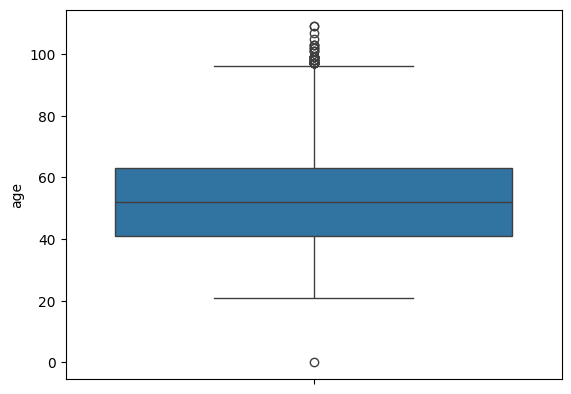

In [70]:
sns.boxplot(util_droped['age'])

In [71]:
util_droped.groupby(['NumberOfTime30-59DaysPastDueNotWorse']).size()

NumberOfTime30-59DaysPastDueNotWorse
0     125239
1      16020
2       4588
3       1750
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [72]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

NumberOfTime60-89DaysPastDueNotWorse
0     141601
1       5723
2       1117
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [73]:
util_droped.groupby(['NumberOfTimes90DaysLate']).size()

NumberOfTimes90DaysLate
0     140875
1       5227
2       1554
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

In [74]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0     89
1    136
dtype: int64

In [75]:
util_droped['DebtRatio'].describe()

count    149150.000000
mean        354.085328
std        2042.235713
min           0.000000
25%           0.177334
50%           0.368200
75%           0.874241
max      329664.000000
Name: DebtRatio, dtype: float64

<Axes: xlabel='DebtRatio', ylabel='Density'>

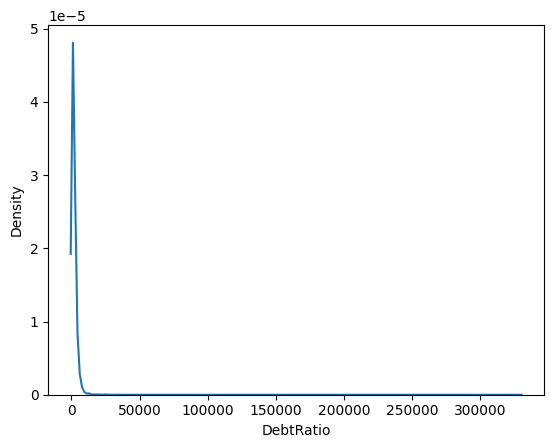

In [76]:
sns.kdeplot(util_droped['DebtRatio'])

In [77]:
util_droped['DebtRatio'].quantile([.975])


0.975    3492.0
Name: DebtRatio, dtype: float64

In [78]:
util_droped[util_droped['DebtRatio']>3492][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3727.000000,3727.000000
mean,0.064395,4798.715321
std,0.245488,1698.867567
min,0.000000,0.000000
25%,0.000000,5400.000000
50%,0.000000,5400.000000
75%,0.000000,5400.000000
max,1.000000,5400.000000


In [79]:
temp = util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])]

In [80]:
temp.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
90,0,0.039388,51,0,15466.0,0.0,7,0,0,0,0.0
326,0,0.013115,43,0,4211.0,0.0,21,0,2,0,2.0
508,0,1.000000,73,0,8500.0,0.0,2,0,0,0,0.0
844,0,0.734284,45,0,11311.0,0.0,6,0,2,1,0.0
3370,0,1.000000,45,0,9260.0,0.0,7,0,4,0,4.0


In [82]:
temp.groupby(['SeriousDlqin2yrs']).size()

SeriousDlqin2yrs
0    380
1      2
dtype: int64

In [83]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio']>3492) & (util_droped['SeriousDlqin2yrs']==util_droped['MonthlyIncome'])].index)

In [85]:
dRatio.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [105]:
pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------------------------------

In [106]:
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [107]:
model = lgb.LGBMClassifier(tree_method='gpu_hist', n_estimator=100)

In [100]:
x = dRatio.drop(['SeriousDlqin2yrs'],axis=1)
y = dRatio['SeriousDlqin2yrs']

In [101]:
x.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [102]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: SeriousDlqin2yrs, dtype: int64

In [108]:
model.fit(x,y.values.ravel())
y_pred = model.predict(x)

[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Number of positive: 9990, number of negative: 138778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 978
[LightGBM] [Info] Number of data points in the train set: 148768, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067152 -> initscore=-2.631291
[LightGBM] [Info] Start training from score -2.631291
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: n_estimator


In [109]:
accuracy_score(y,y_pred)

0.9406861690686169

In [110]:
cm = confusion_matrix(y,y_pred)

Text(50.722222222222214, 0.5, 'actuals')

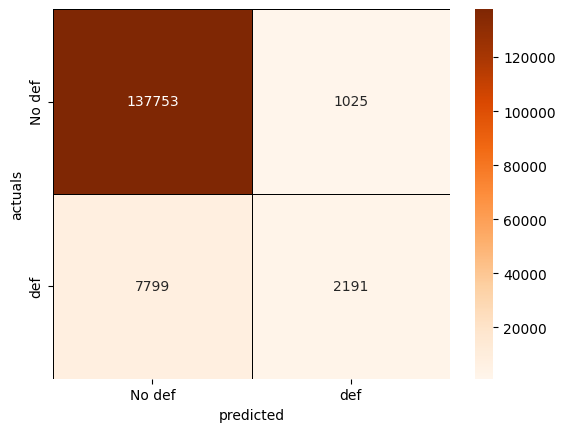

In [111]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [112]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    138778
           1       0.68      0.22      0.33      9990

    accuracy                           0.94    148768
   macro avg       0.81      0.61      0.65    148768
weighted avg       0.93      0.94      0.93    148768

